In [1]:
# # This code allows to output more than one variable value without using a print statement.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# # Default
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True


## Load dataset

In [3]:
# Load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set:', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)
print()

# Normalization
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

train set: (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)



## Sequential API

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


## 7-1. Functional API

In [5]:
# Input layer
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# Chain dense layers
x1 = Flatten(name='Flatten')(input_layer)
x2 = Dense(256, activation='relu', name='Dense1')(x1)
x3 = Dense(64, activation='relu', name='Dense2')(x2)
x4 = Dense(32, activation='relu', name='Dense3')(x3)
x5 = Dense(10, activation='softmax', name='OutputLayer')(x4)

In [6]:
functional_model = tf.keras.Model(inputs=input_layer, outputs=x5, name='FunctionalModel')
functional_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 28, 28)]          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
Dense2 (Dense)               (None, 64)                16448     
_________________________________________________________________
Dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                330       
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_____________________________________________

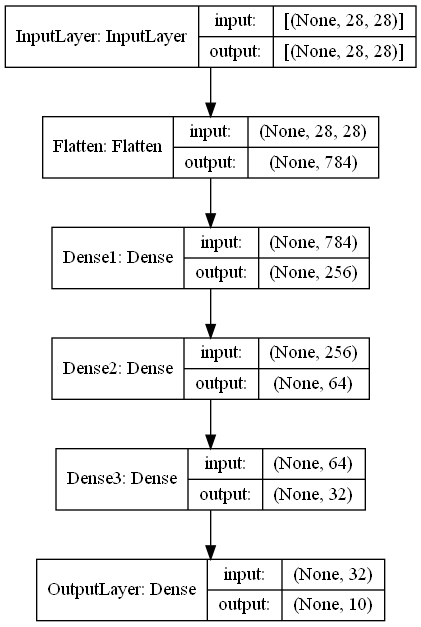

In [7]:
# Model structure visualization
from tensorflow.keras.utils import plot_model

plot_model(functional_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [8]:
# Compile
functional_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Callback
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto', restore_best_weights=True)

# Fit
functional_model.fit(x_train, y_train, 
                     validation_data=(x_test, y_test), 
                     epochs=10, verbose=1, 
                     callbacks=[monitor])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2320 - acc: 0.9296 - val_loss: 0.1203 - val_acc: 0.9621
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0915 - acc: 0.9717 - val_loss: 0.0947 - val_acc: 0.9703
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - acc: 0.9789 - val_loss: 0.0996 - val_acc: 0.9691
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - acc: 0.9839 - val_loss: 0.0844 - val_acc: 0.9754
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0381 - acc: 0.9872 - val_loss: 0.0839 - val_acc: 0.9779
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - acc: 0.9896 - val_loss: 0.0774 - val_acc: 0.9772
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0826 - val_acc: 0.9769
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [9]:
functional_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - acc: 0.9772


[0.07739053666591644, 0.9771999716758728]

## 7-2 Model Subclassing

In [12]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(32, activation='relu')
        self.dense4 = tf.keras.layers.Dense(10, activation='softmax')
        
    # method overriding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return x

In [15]:
mymodel = MyModel()
mymodel._name = 'subclass_model'
mymodel(tf.keras.layers.Input(shape=(28,28)))
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  200960    
_________________________________________________________________
dense_13 (Dense)             multiple                  16448     
_________________________________________________________________
dense_14 (Dense)             multiple                  2080      
_________________________________________________________________
dense_15 (Dense)             multiple                  330       
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Callback
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto', restore_best_weights=True)

# Fit
history = mymodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1, callbacks=[monitor])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2246 - acc: 0.9331 - val_loss: 0.1190 - val_acc: 0.9639
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0945 - acc: 0.9719 - val_loss: 0.1087 - val_acc: 0.9678
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - acc: 0.9793 - val_loss: 0.0882 - val_acc: 0.9734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0801 - val_acc: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - acc: 0.9869 - val_loss: 0.0827 - val_acc: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - acc: 0.9893 - val_loss: 0.0814 - val_acc: 0.9792
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0923 - val_acc: 0.9768
Restoring model weights from the end of the best epoch.
Epoch 

## 7-3. Subclassing Model Parameters

In [24]:
class MyModel(tf.keras.Model):
    def __init__(self, units, num_classes):   # self, units, num_classes
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(32, activation='relu')
        self.dense4 = tf.keras.layers.Dense(10, activation='softmax')
        
    # method overriding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return x

In [26]:
mymodel = MyModel(256, 10)   # 256, 10
mymodel._name = 'subclass_model'
mymodel(tf.keras.layers.Input(shape=(28,28)))
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  200960    
_________________________________________________________________
dense_21 (Dense)             multiple                  16448     
_________________________________________________________________
dense_22 (Dense)             multiple                  2080      
_________________________________________________________________
dense_23 (Dense)             multiple                  330       
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Callback
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto', restore_best_weights=True)

# Fit
history = mymodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1, callbacks=[monitor])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2286 - acc: 0.9327 - val_loss: 0.1233 - val_acc: 0.9606
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0946 - acc: 0.9708 - val_loss: 0.1091 - val_acc: 0.9660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - acc: 0.9795 - val_loss: 0.0809 - val_acc: 0.9753
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0507 - acc: 0.9841 - val_loss: 0.0781 - val_acc: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0394 - acc: 0.9871 - val_loss: 0.0879 - val_acc: 0.9757
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - acc: 0.9895 - val_loss: 0.0945 - val_acc: 0.9747
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0947 - val_acc: 0.9766
Restoring model weights from the end of the best epoch.
Epoch 